<a href="https://colab.research.google.com/github/vishakanilavan/Assessment/blob/main/Assessment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) PROJECT DESCRIPTION:**





```
Source of the Data: 
```
 * This Dataset is taken from kaggle Heart Diseases-Datasets.
 https://www.kaggle.com/datasets/mdriponmiah/heard-disease-prediction




```
Problem Statement:
```



**Disease Detection** is one of the most demandable problem statements.

* In this project, Dataset has many Categorical Features of patients having diseases or not.

* As Many Kaggle Notebooks related to this dataset focuses on the prediction of Heart diseases, I take ***Prediction of Skin cancer*** as Target variable

* Target Variable ---> **SkinCancer** prediction


```
BUSINESS SCOPE/ VALUE OF THE PROJECT: 
```
* Disease Prediction problem statement is widely used by Insurance companies for the clients before they give certain scheme for customers.

* In Medical Field, It can support Doctors before making decision regarding Treatement to patients.






# **2) IMPORTING DATASET AND LOADING DATA:**:

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [364]:
data=pd.read_csv("/content/Heart Disease.csv")

In [365]:
df=data.copy()

In [366]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# **3) EDA AND DATA PREPROCESSING:**

3.1 INITIAL ANALYSIS:

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [368]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There are 5 Null values in Total dataset. We have to handle Null values.

In [369]:
# Seperating columns as Category and Numerical columns for easy handling
Num_columns=list(df.select_dtypes(include='float'))
Cat_columns=list(df.select_dtypes(include='object'))

In [370]:
Num_columns

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [371]:
Cat_columns

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [372]:
df.describe() # For Numerical columns

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [373]:
df.describe(include='object') #For categorical columns

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [374]:
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [375]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [376]:
df['HeartDisease'].value_counts() # Target variable 

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Target Variable 'SkinCancer' value_counts() shows that Target variable is imbalance. 

<Axes: >

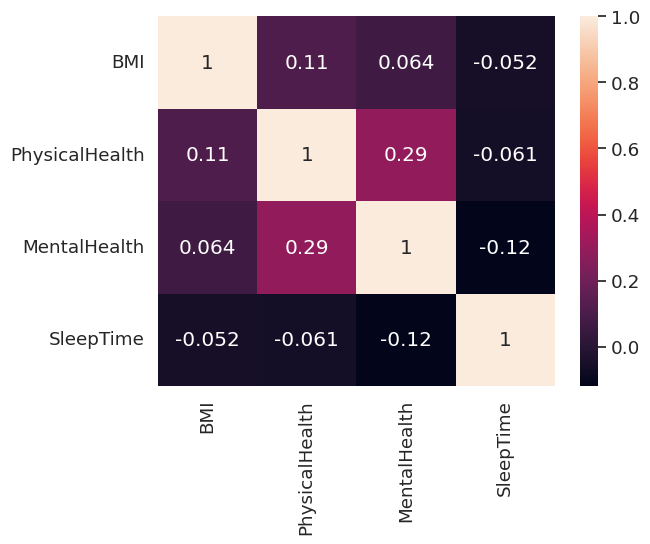

In [377]:
sns.heatmap(df.corr(),annot=True)

From the Heatmap,Highly Correalted Features are,
*    MentalHealth and MentaLHealth (~30%)

*    PhysicalHealth and MentalHealth (~10%)

3.2 HANDLING MISSING VALUES:

In [378]:
for col in Cat_columns:
  if df[col].isna().sum() >= 1:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [379]:
for col in Num_columns:
    if df[col].isna().sum() >= 1:
      df[col].fillna(df[col].median(),inplace=True)


In [380]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

* Since column is Numerical and skewed, null value can be replaced with Median 
value.

* For Categorical Columns, Null values can be replaced by Mode of that column

* Now All the Null values are filled



3.2) EDA-1:

In [381]:
for col in Cat_columns:
    
    fig = px.pie(df[col], values=df[col].value_counts().values, names=df[col].value_counts().index,title=col,color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(hoverinfo='label+percent', textinfo='value')
    fig.show()


From the Pie chart, Approximately Balanced Features are
*    Age Column
*    Sex Column
*    Smoking Column.(MOderately Balanced)

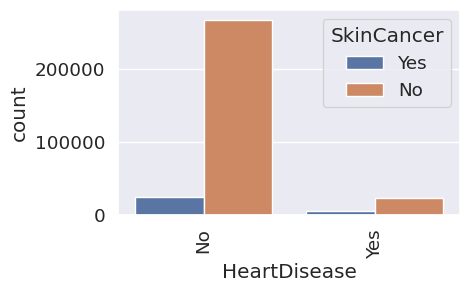

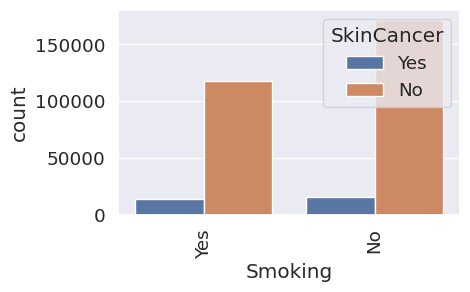

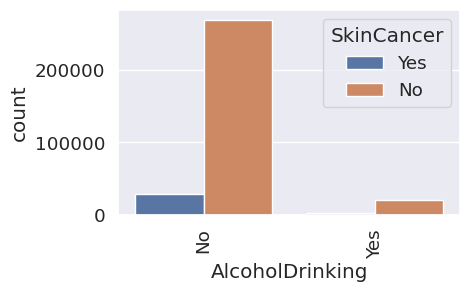

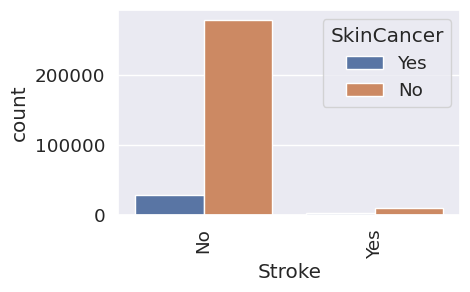

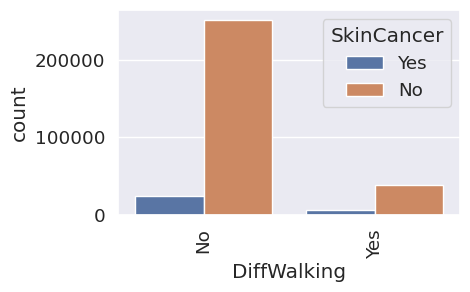

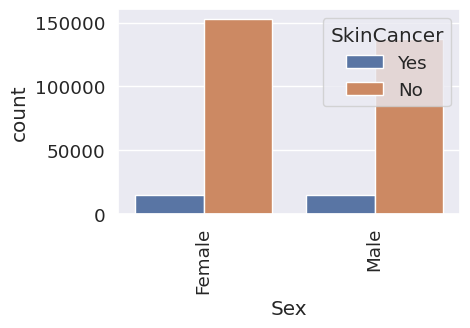

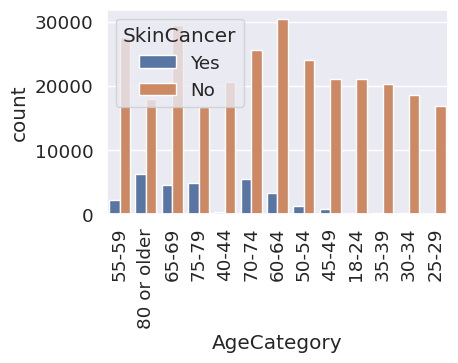

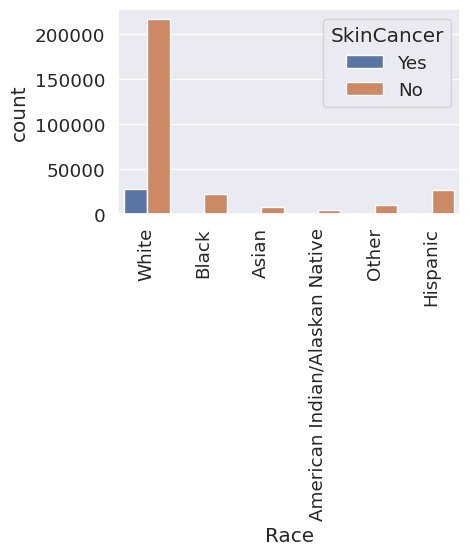

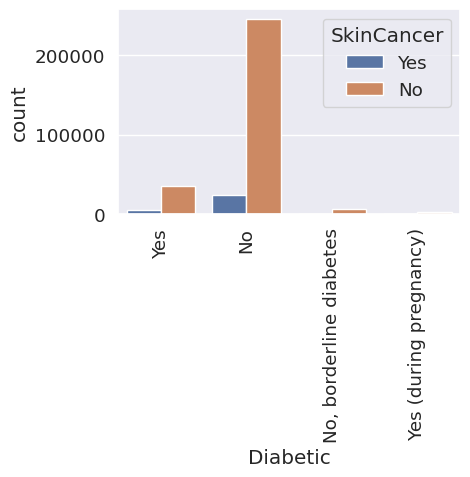

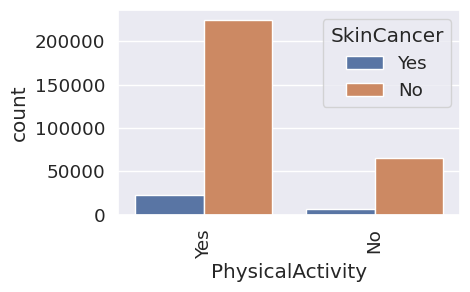

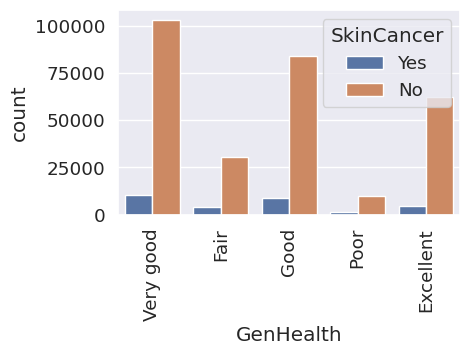

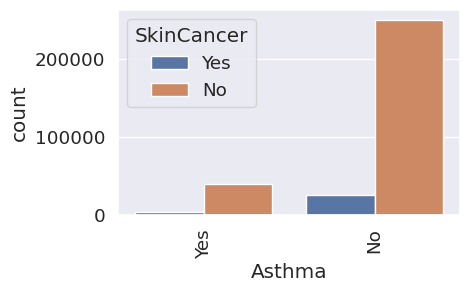

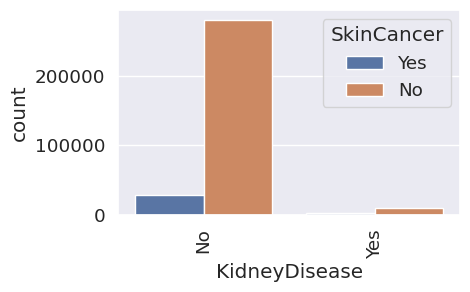

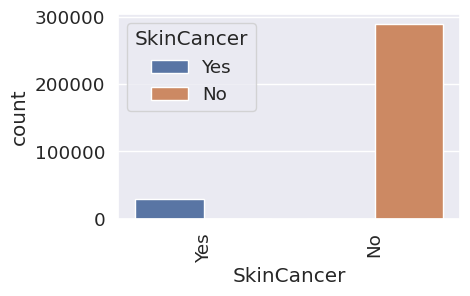

In [382]:

for i,col in enumerate(Cat_columns):
  plt.figure(figsize=(15,25))
  plt.subplot(8,3,i+1)
  sns.countplot(x=df[col],hue=df['SkinCancer'])
  plt.xticks(rotation=90)
  plt.show()

From the Countplots of Vrious Features in additional point of view of 'SkinCare',Important/Impactful relations are

*    Data says, **Most of the 'SkinCare' Affected Patients are above 45 Age Category**

*    **White Race People got mostly affected with 'SkinCare'**than all other races. Other race people such as Asian,AlaskanNative,Black,Hispanian are not affected mostly.

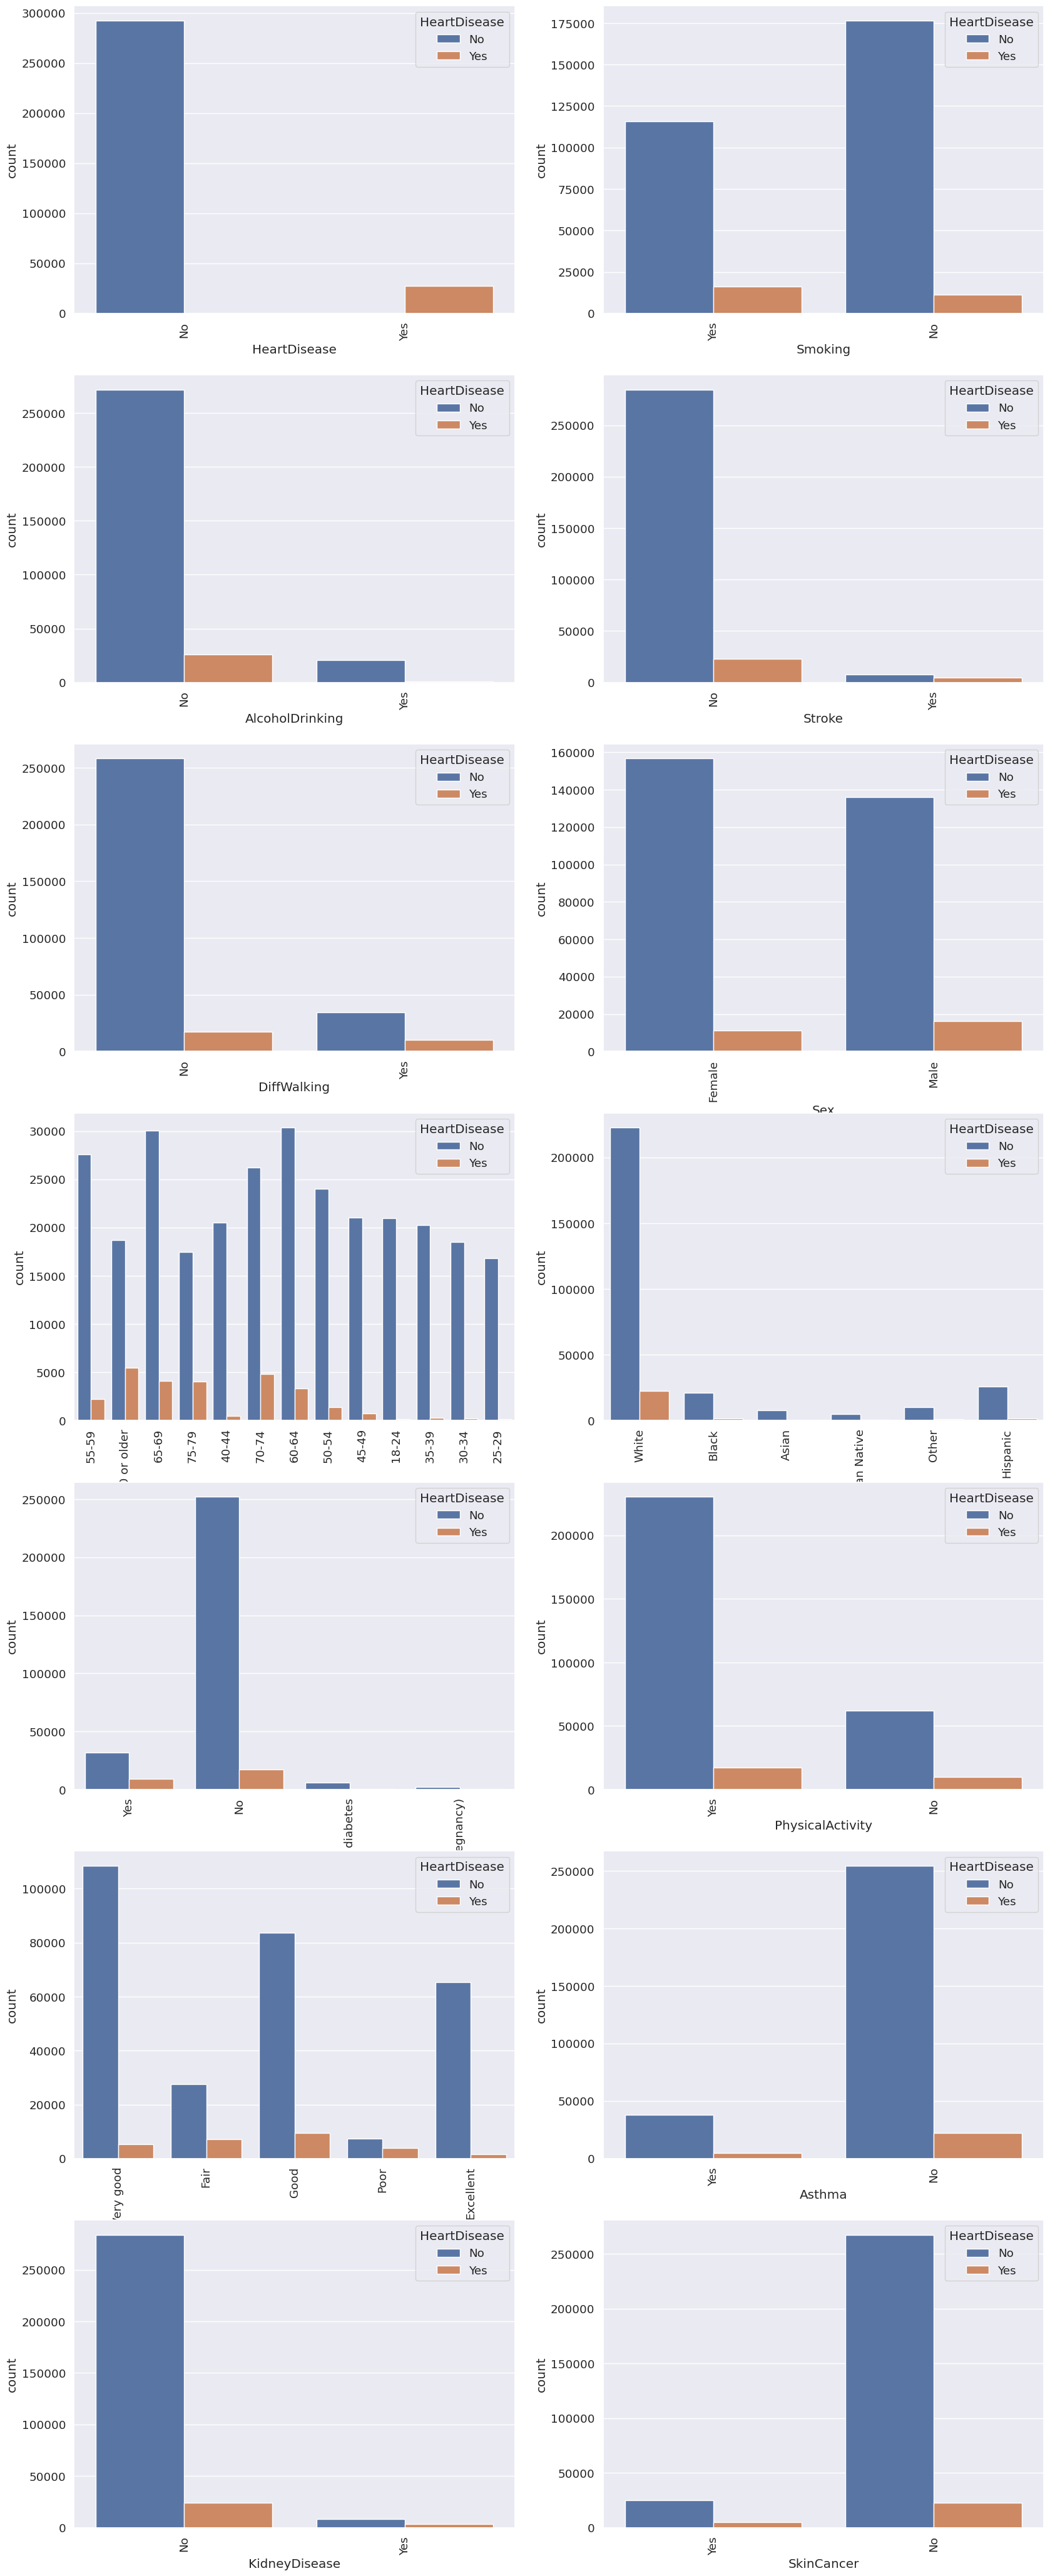

In [383]:
plt.figure(figsize=(20,60))
for i,col in enumerate(Cat_columns):
  plt.subplot(8,2,i+1)
  sns.countplot(x=df[col],hue=df['HeartDisease'])
  plt.xticks(rotation=90)
plt.show()

From the Countplots of Vrious Features in additional point of view of 'HealthDisease',Important/Impactful relations are

*    Data says, **Most of the 'HeartDisease' Affected Patients are above 45 Age Category**.
*    Male has slightly higher chances of having HeartDisease than Female.

*    **Almost 15% of Smoking People have risk of ending up in 'HeartDisease'**

*    One-Fourth of People having KidneyDisease,have also 'HeartDisease'.

*    Almost Half Of stroke affected people have "HeartDisease".

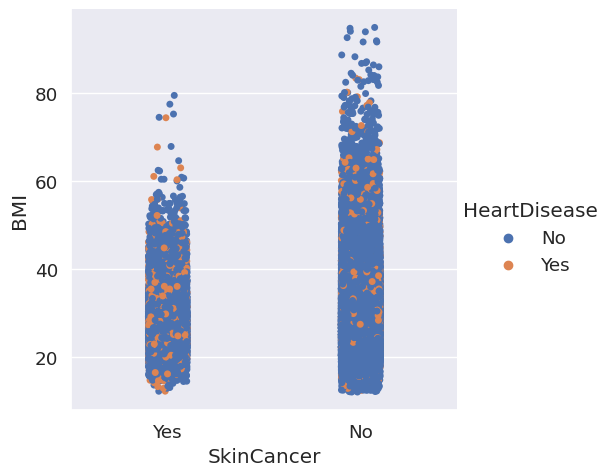

In [384]:
sns.catplot(data=df, y="BMI", x="SkinCancer",hue='HeartDisease')

<Figure size 1000x1500 with 0 Axes>

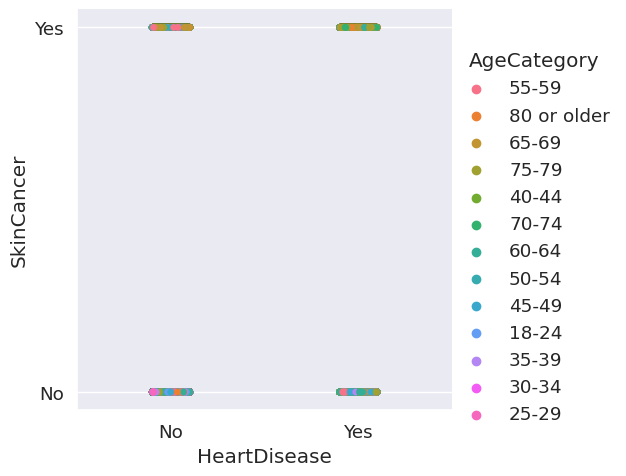

In [385]:
plt.figure(figsize=(10,15))
sns.catplot(data=df, x="HeartDisease", y="SkinCancer",hue='AgeCategory')

Catplot Is Categorical Scatter PLot Used to compare Categorical and Numerical Variables in scatterplot manner.

*   First Figure is about relation between BMI, HeartDisease and SkinCancer. It shows BMI is not related so much with HeartDisease and SkinCancer.

*   Last figure is comparing Age, HeartDisease,and SkinCare.
*   As age becoming higher, Probablity Of Causing HeartDisease and SkinCancer also becomes higher. 

In [386]:
df[df['BMI']>=60]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
561,No,75.82,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,8.0,Yes,Yes,No
2359,No,66.56,Yes,No,No,0.0,0.0,Yes,Female,70-74,Black,No,No,Fair,9.0,No,No,No
3094,No,62.65,Yes,Yes,No,0.0,0.0,No,Male,45-49,White,No,Yes,Good,7.0,No,No,No
3143,No,66.18,No,No,No,20.0,0.0,Yes,Female,50-54,Black,Yes,No,Poor,12.0,Yes,No,No
4084,No,60.46,No,No,No,25.0,15.0,Yes,Female,30-34,White,No,No,Poor,6.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313317,No,60.54,No,No,No,0.0,0.0,No,Male,55-59,White,No,No,Good,3.0,No,No,No
315162,No,60.82,No,No,No,0.0,0.0,No,Female,40-44,Other,No,No,Excellent,8.0,Yes,No,No
317263,No,62.00,No,No,No,30.0,30.0,Yes,Female,65-69,Hispanic,No,No,Fair,6.0,Yes,No,No
318792,No,60.19,No,No,No,0.0,0.0,Yes,Female,65-69,Hispanic,No,Yes,Fair,5.0,Yes,No,No


3.3) ENCODING THE CATEGORY DATA:

In [387]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in Cat_columns:
  df[col]=label_encoder.fit_transform(df[col])

In [388]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

<Axes: >

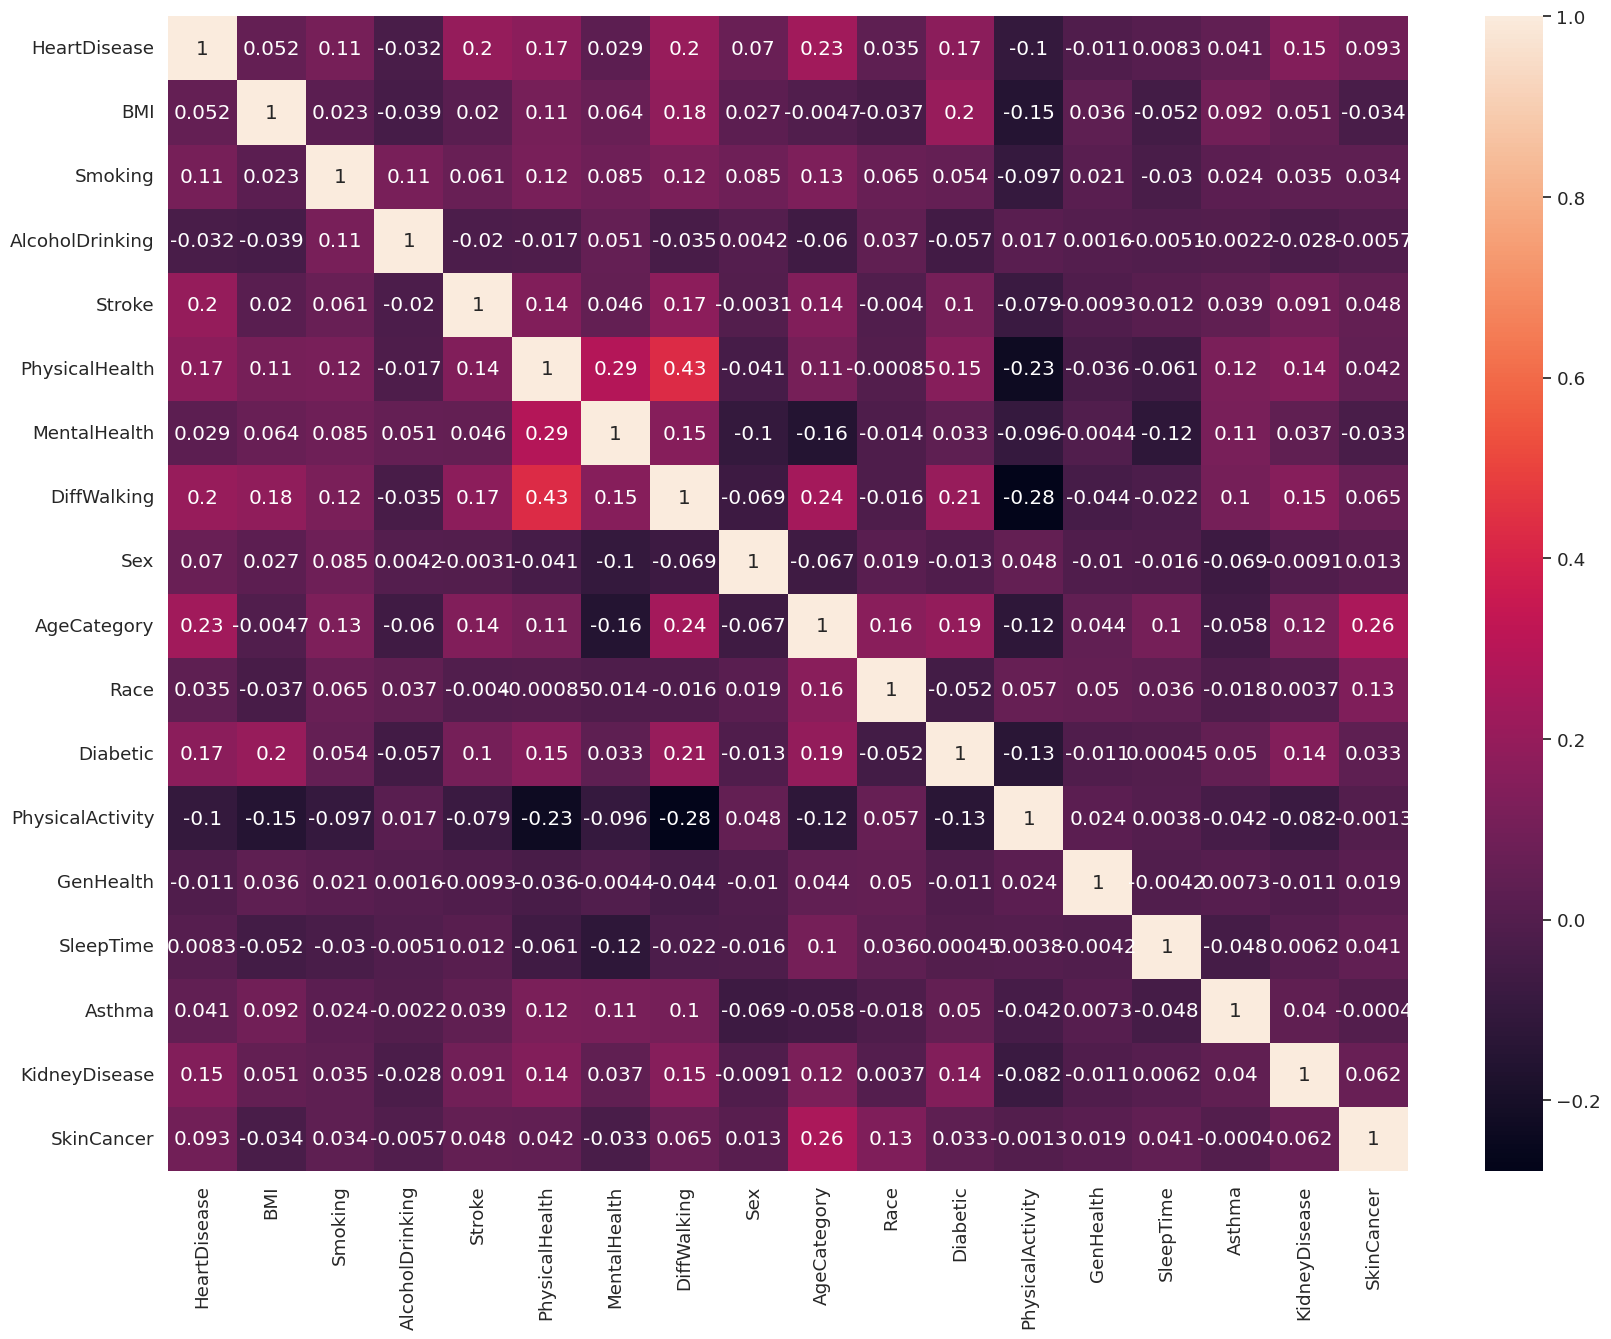

In [390]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

From the Heatmap,

Highly Correalted Features of 'SkinCare'(Target Variable) are,
*     AgeCategory (26%)
*     Race (13%)
*     HeartDisease(~10%)

Highly Correalted Features of 'HeartDisease' are,
*     AgeCategory(23%)
*     DiffWalking(20%)
*     Diabetic(17%) and PhysicalHealth(17%)
*     KidneyDisease(15%)
*     Smoking (11%)

Some Highly Correlated Independent Features:
*     Diffwalking and PhysicalHealth(43%)
*     Diffwalking and PhysicalActivity(28%)
*     AgeCategory and Diffwalking(24%)
*     Diffwalking and Diabetis(21%)
*     HealthDisease and Diffwalking(20%)


So, Most Important Feature seems to be 'Diffwalking'.It means affecting health generally leads in difficulty of walking.

In [391]:
col=list(df.columns)
col

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [392]:
new_col=['HeartDisease',
 'DiffWalking',
 'AgeCategory',
 'Diabetic',
 'KidneyDisease',
 'SkinCancer']


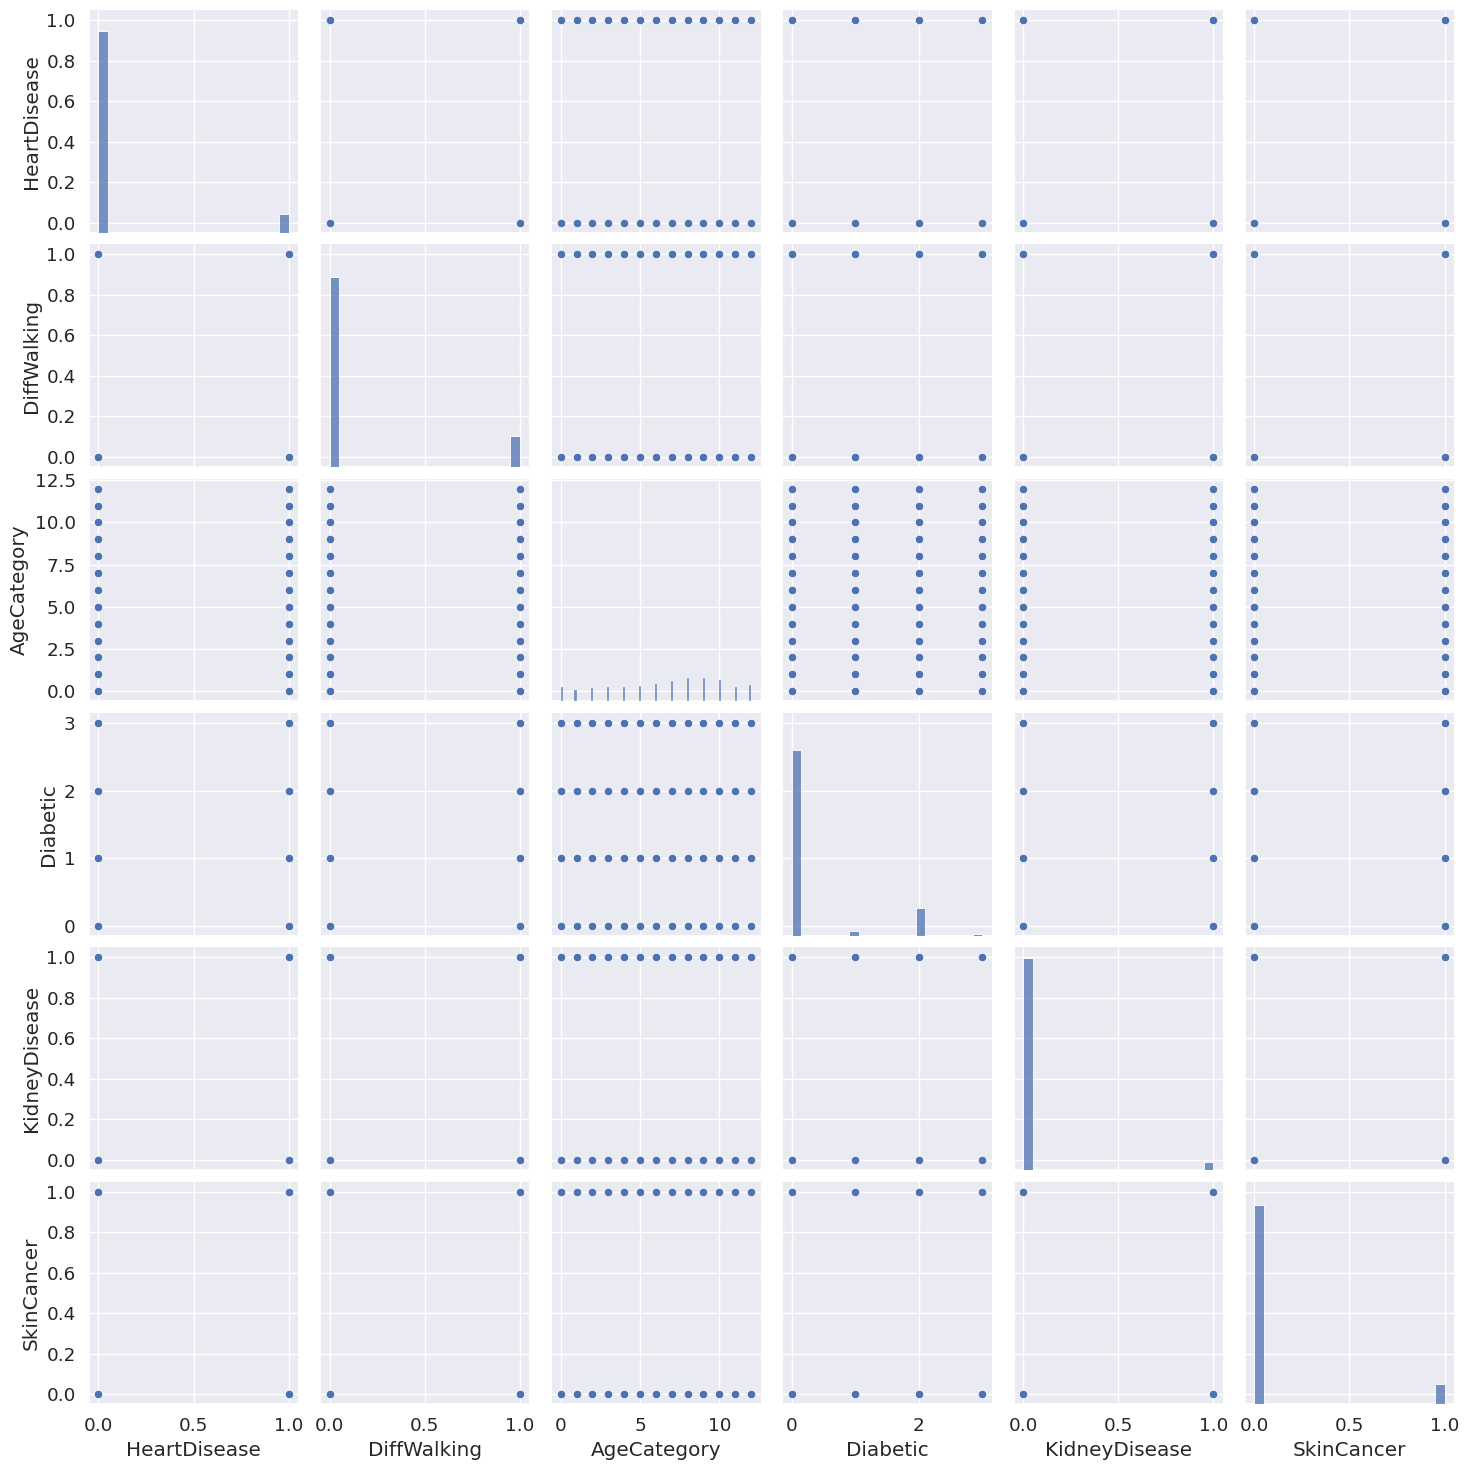

In [393]:
sns.pairplot(df[new_col])

3.4 CHECKING FOR OUTLIERS:

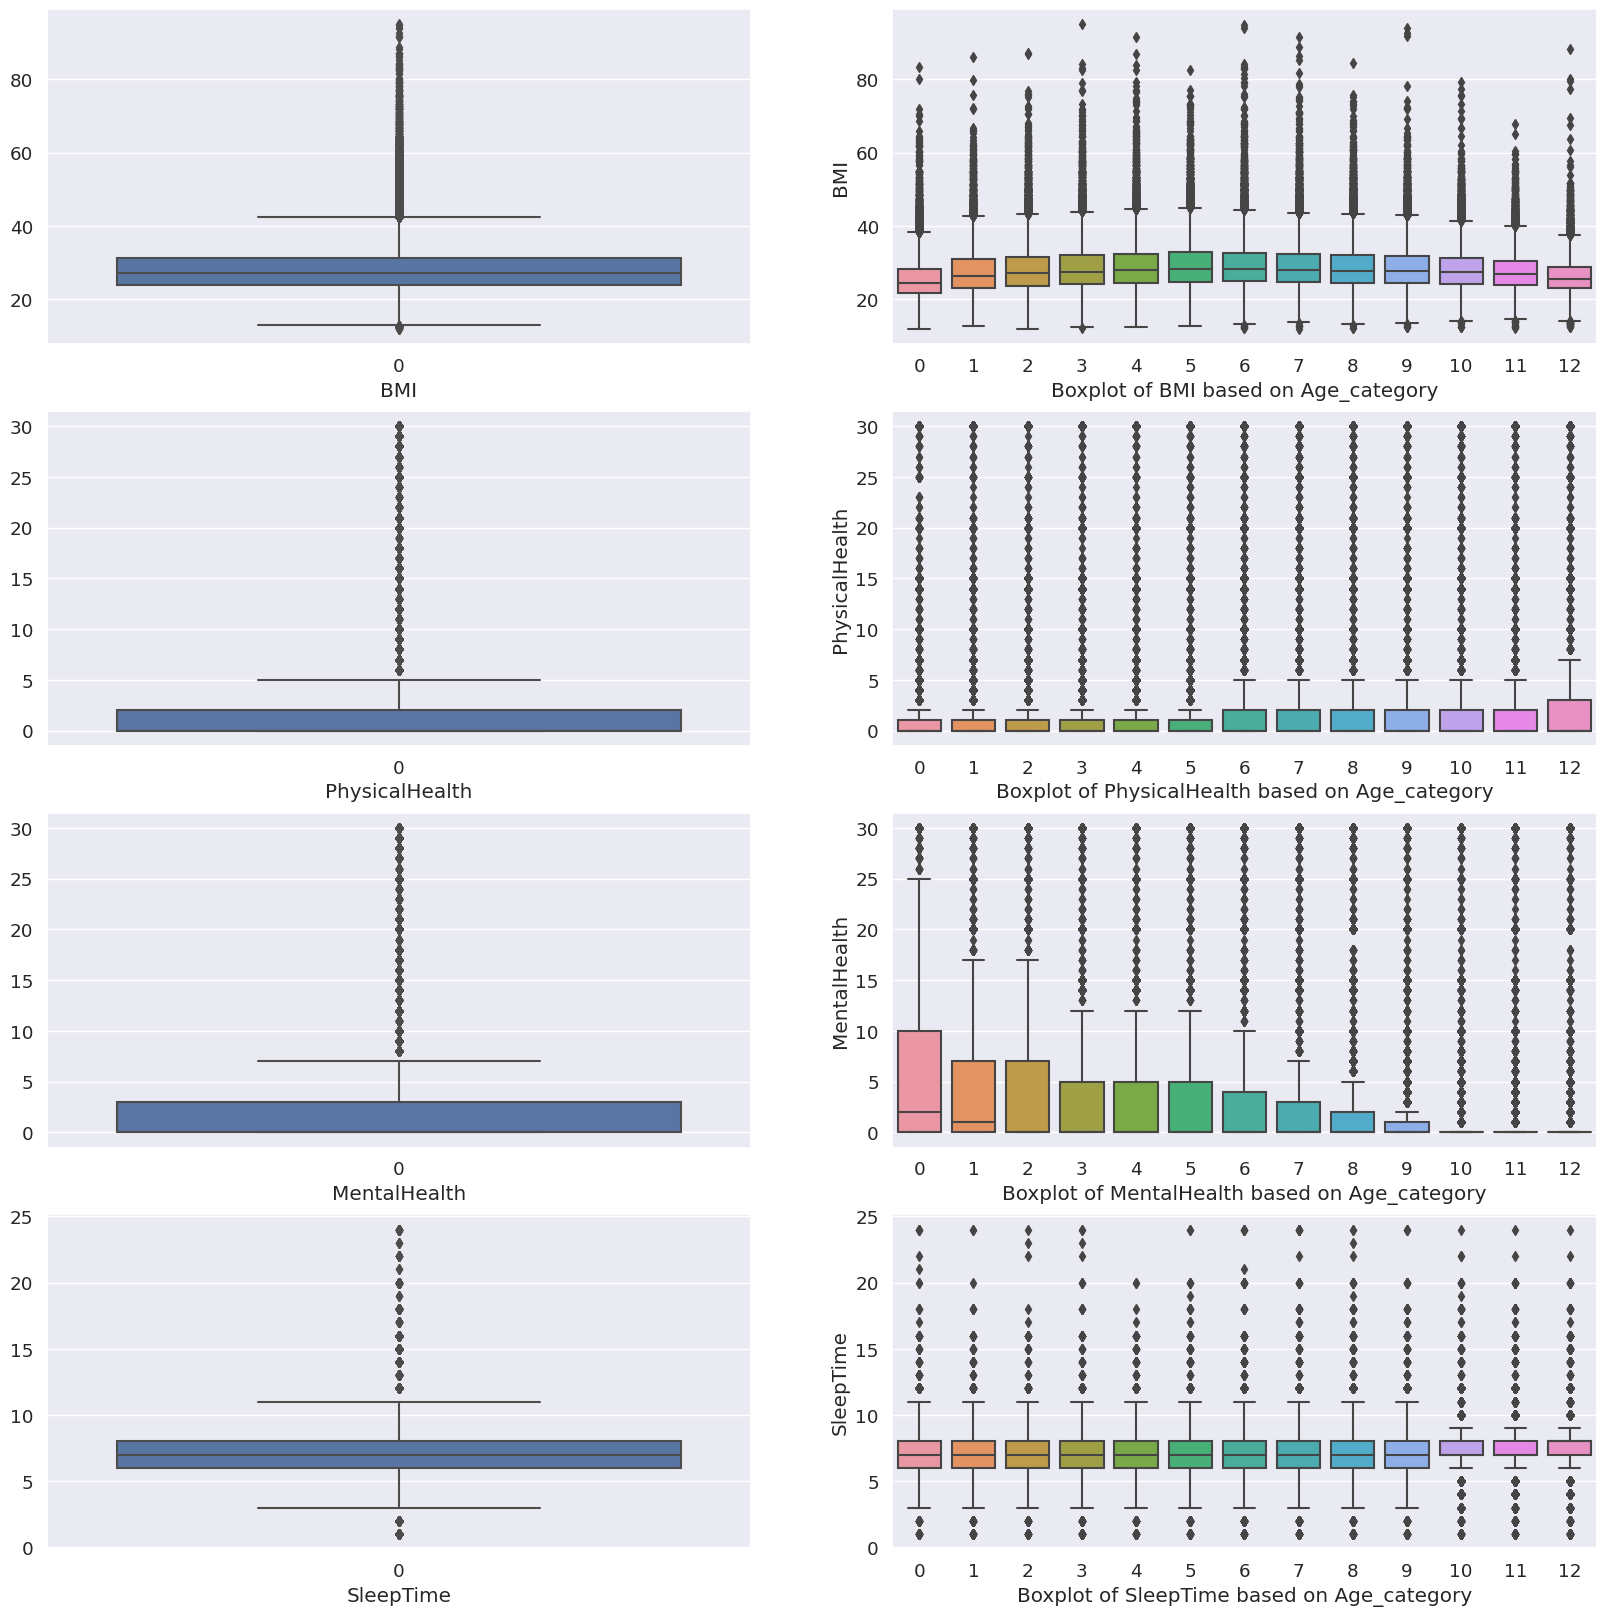

In [394]:
plt.figure(figsize=(20,20))
x=1
for i,col in enumerate(Num_columns):
  plt.subplot(4,2,x)
  sns.boxplot(df[col])
  plt.xlabel(col)
  x=x+1
  plt.subplot(4,2,x)
  sns.boxplot(y=df[col],x=df['AgeCategory'])
  plt.xlabel(f'Boxplot of {col} based on Age_category')
  x=x+1

plt.show()

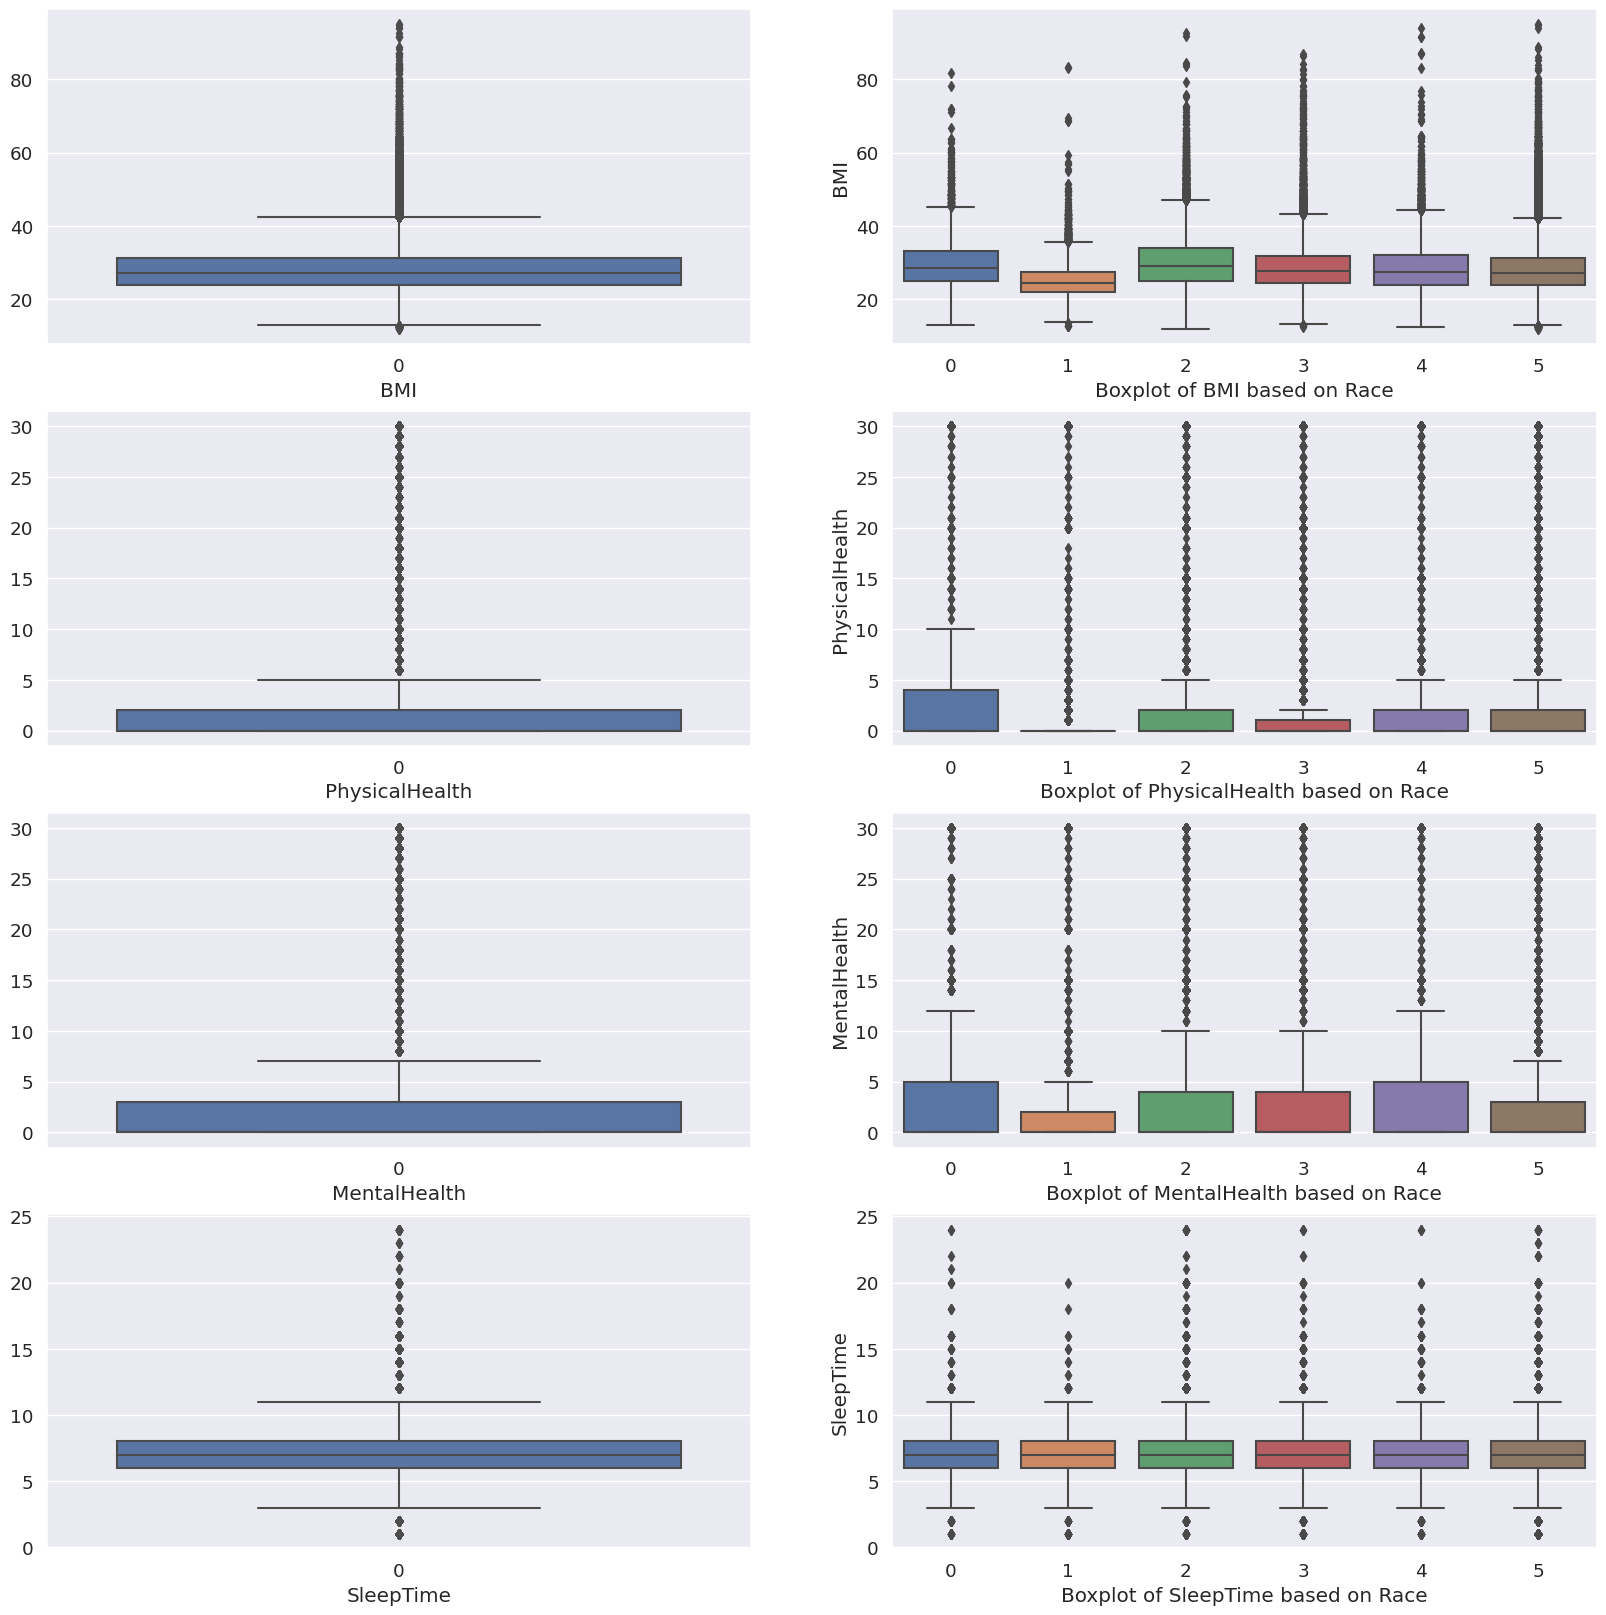

In [395]:
plt.figure(figsize=(20,20))
x=1
for i,col in enumerate(Num_columns):
  plt.subplot(4,2,x)
  sns.boxplot(df[col])
  plt.xlabel(col)
  x=x+1
  plt.subplot(4,2,x)
  sns.boxplot(y=df[col],x=df['Race'])
  plt.xlabel(f'Boxplot of {col} based on Race')
  x=x+1

plt.show()

In [396]:
df['PhysicalHealth'].value_counts()

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [397]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [398]:
columns=Num_columns
columns

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [399]:
new_df=df[columns]

In [400]:
outlier_index=[]
for i in columns:
    import numpy as np
    q1=np.percentile(df[i],25,interpolation="midpoint")
    q3=np.percentile(df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower=df.index[df[i]<(q1-1.5*iqr1)]
    lowercount=np.size(lower)
    print("Lower limit of {column} are {lower} ".format(column=i,lower=q1-1.5*iqr1))
    outlier_index.extend(lower)
    upper=df.index[df[i]>(q3+1.5*iqr1)]
    uppercount=np.size(upper)
    print("Upper limit of {column} are {upper} ".format(column=i,upper=q3+1.5*iqr1))
    outlier_index.extend(upper)
    totalcount=lowercount+uppercount
    print("Total Outliers of {column} is {x}".format(column=i,x=totalcount))
    

outlier_index.sort()
outlier_index1=sorted(set(outlier_index),key=outlier_index.index)  
print("Total outliers of all columns are",len(outlier_index))
print("Total unique outliers of all columns are",len(outlier_index1))

q1 value of BMI is 24.03
q3 value of BMI is 31.42
iqr value of BMI is 7.390000000000001
Lower limit of BMI are 12.945 
Upper limit of BMI are 42.505 
Total Outliers of BMI is 10396
q1 value of PhysicalHealth is 0.0
q3 value of PhysicalHealth is 2.0
iqr value of PhysicalHealth is 2.0
Lower limit of PhysicalHealth are -3.0 
Upper limit of PhysicalHealth are 5.0 
Total Outliers of PhysicalHealth is 47146
q1 value of MentalHealth is 0.0
q3 value of MentalHealth is 3.0
iqr value of MentalHealth is 3.0
Lower limit of MentalHealth are -4.5 
Upper limit of MentalHealth are 7.5 
Total Outliers of MentalHealth is 51576
q1 value of SleepTime is 6.0
q3 value of SleepTime is 8.0
iqr value of SleepTime is 2.0
Lower limit of SleepTime are 3.0 
Upper limit of SleepTime are 11.0 
Total Outliers of SleepTime is 4543
Total outliers of all columns are 113661
Total unique outliers of all columns are 88775


In [401]:
88775 / df.shape[0] #(28%)

0.27759971231570224

From the Box Plot and iqr range quartile function,
*  Total Outliers are 88775 (28%) and we can't lose so much data.
*  It is determined that all Numerical columns in the data have Outliers.
*  And Simply Removing all outliers will affect the model when it is tested with datasets having Outliers.
*  **But Removing General Outliers of feature may not be correct as in case of mentalhealth.Because Average Upper fence is  around 8. But It changes very much when plotted against x as 'AgeCategory'.so It is also important to check outliers in Bivariare/ Two dimension.**
*  So, It is better to modify outlier by imputing Lower limit value to all outlier outside lower limit and imputing Upper Limit value to all outliers lying outside Upper Outlier.


In [402]:
for i in columns:
    import numpy as np
    q1=np.percentile(new_df[i],25,interpolation="midpoint")
    q3=np.percentile(new_df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower_limit=q1-1.5*iqr1
    upper_limit=q3+1.5*iqr1
    print("Lower limit",lower_limit)
    print("Upper limit",upper_limit)
    df[i]=np.where(new_df[i]<lower_limit,lower_limit,np.where(new_df[i]>upper_limit,upper_limit,df[i]))


q1 value of BMI is 24.03
q3 value of BMI is 31.42
iqr value of BMI is 7.390000000000001
Lower limit 12.945
Upper limit 42.505
q1 value of PhysicalHealth is 0.0
q3 value of PhysicalHealth is 2.0
iqr value of PhysicalHealth is 2.0
Lower limit -3.0
Upper limit 5.0
q1 value of MentalHealth is 0.0
q3 value of MentalHealth is 3.0
iqr value of MentalHealth is 3.0
Lower limit -4.5
Upper limit 7.5
q1 value of SleepTime is 6.0
q3 value of SleepTime is 8.0
iqr value of SleepTime is 2.0
Lower limit 3.0
Upper limit 11.0


In [403]:
df.shape

(319795, 18)

In [405]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.600,1,0,0,3.0,7.5,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.340,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.580,1,0,0,5.0,7.5,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.210,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.710,0,0,0,5.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.410,1,0,0,5.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.840,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.240,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.810,0,0,0,0.0,0.0,0,0,1,3,0,0,2,11.0,0,0,0


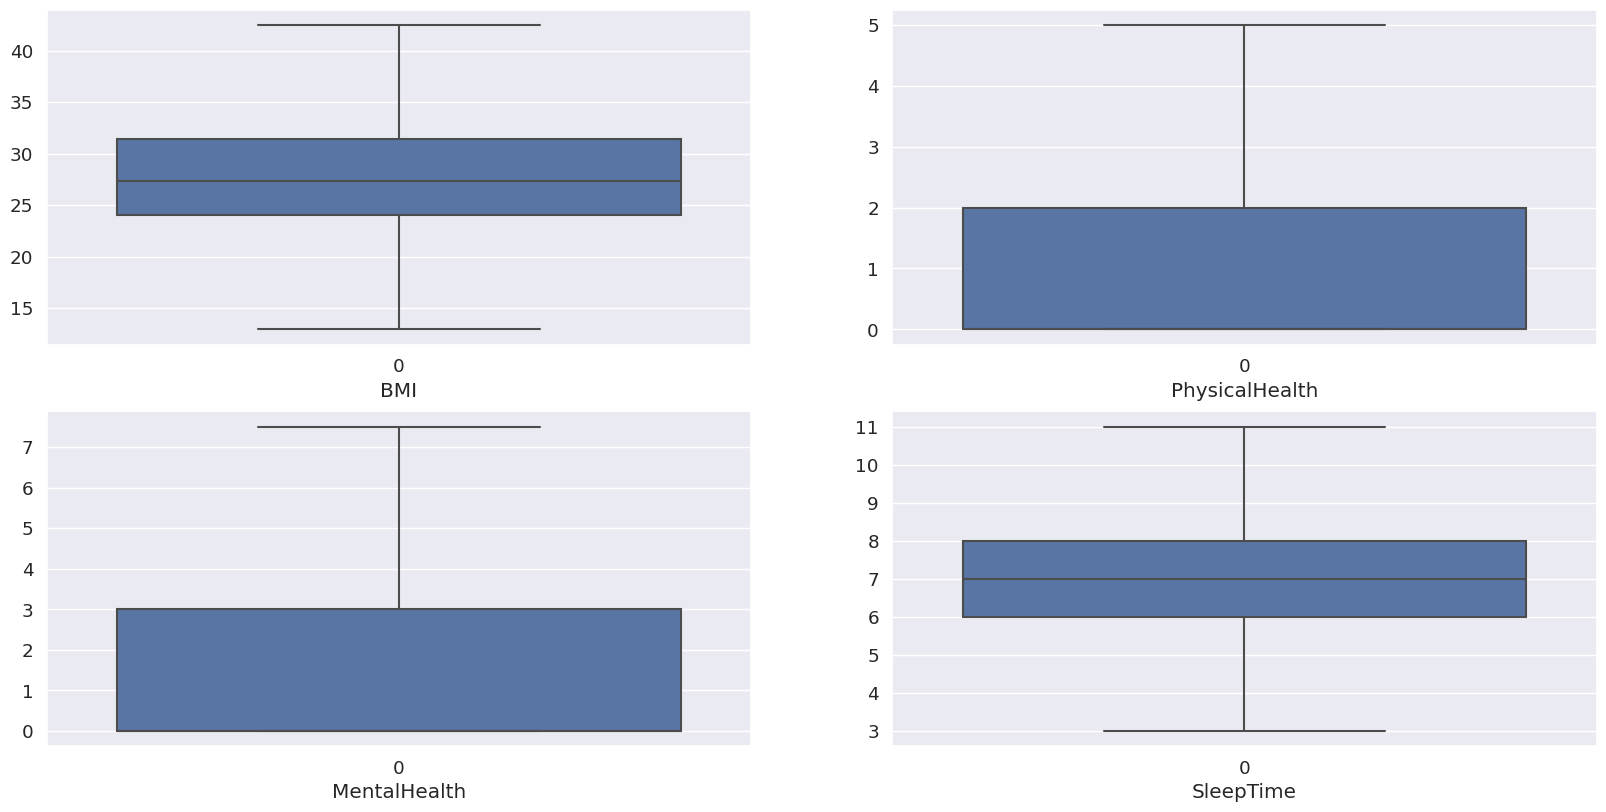

In [404]:
plt.figure(figsize=(20,20))
x=1
for i,col in enumerate(Num_columns):
  plt.subplot(4,2,x)
  sns.boxplot(df[col])
  plt.xlabel(col)
  x=x+1

Outliers reduced after imputing with Lower limit and Upper Limit Values

# **4) MODEL BUILDING:**

4.1) FOR PREDICTION OF HEART DISEASE:

**WITHOUT SAMPLING**:

Splitting Data:

In [406]:
x=df.drop(['SkinCancer'],axis=1)
y=df['SkinCancer']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [407]:
print("Shape of x is",x.shape)


Shape of x is (319795, 17)


In [408]:
print('Training Dataset without HeartDisease',sum(y_train==0))
print('Training Dataset with HeartDisease',sum(y_train==1))

Training Dataset without HeartDisease 202961
Training Dataset with HeartDisease 20895


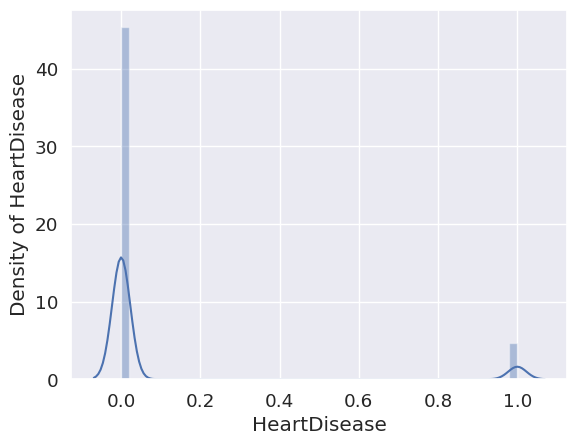

In [409]:
sns.distplot(y)
plt.xlabel("HeartDisease")
plt.ylabel("Density of HeartDisease")
#plt.title("Check Density of Heart Disease")
plt.show()

Function of Model Buliding And Evaluation:

In [410]:
model_name_lt=[]
Accuracy_lt=[]
Precision_lt=[]
Recall_lt=[]

In [411]:
# Function For Building Models
def Model(x_train,x_test,y_train,y_test,classifier,modelname):
    classifier.fit(x_train,y_train)
    score=classifier.score(x_train,y_train)
    print("The score of trained model is",score)
    y_pred=classifier.predict(x_test)
    from sklearn.metrics import (classification_report,confusion_matrix,recall_score,accuracy_score,
                                precision_score,roc_curve)
    
    confusion_matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is")
    print(confusion_matrix)

    classification_report=classification_report(y_test,y_pred)
    print("Classification Matrix")
    print(classification_report)

    accuracy=accuracy_score(y_test,y_pred)
    print("Accuracy:",accuracy)

    precision=precision_score(y_test,y_pred)
    print("Precision:",precision)

    recall=recall_score(y_test,y_pred)
    print("Recall",recall)

    f1_score=(2*precision*recall)/(precision+recall)
    print("F1_score:",f1_score)

    model_name_lt.append(modelname)
    Accuracy_lt.append(accuracy)
    Precision_lt.append(precision)
    Recall_lt.append(recall)




**1) LOGISTIC REGRESSION:**

In [412]:
def linear_model():
    from sklearn.linear_model import LogisticRegression
    classifier_name='Logistic_Regression'
    lgR=LogisticRegression(random_state=48)
    Model(x_train,x_test,y_train,y_test,lgR,classifier_name)

In [413]:
linear_model()

The score of trained model is 0.9066810806947323
Confusion Matrix is
[[87005    10]
 [ 8915     9]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87015
           1       0.47      0.00      0.00      8924

    accuracy                           0.91     95939
   macro avg       0.69      0.50      0.48     95939
weighted avg       0.87      0.91      0.86     95939

Accuracy: 0.906972138546368
Precision: 0.47368421052631576
Recall 0.0010085163603765128
F1_score: 0.0020127474002012745


2) DECISION TREES:

In [414]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    DT_clf=DecisionTreeClassifier(random_state=48)
    classifier_name='DECISION TREE'
    Model(x_train,x_test,y_train,y_test,DT_clf,classifier_name)

In [415]:
decision_tree()

The score of trained model is 0.9917982989064399
Confusion Matrix is
[[79225  7790]
 [ 7150  1774]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     87015
           1       0.19      0.20      0.19      8924

    accuracy                           0.84     95939
   macro avg       0.55      0.55      0.55     95939
weighted avg       0.85      0.84      0.85     95939

Accuracy: 0.8442760504070295
Precision: 0.18548724383103304
Recall 0.19878978036754819
F1_score: 0.19190826482042408


3) RANDOM FOREST:

In [416]:
def random_forest():
  from sklearn.ensemble import RandomForestClassifier
  rfclf = RandomForestClassifier(random_state=48)
  classifier_name='RANDOM FOREST'
  Model(x_train,x_test,y_train,y_test,rfclf,classifier_name)

In [417]:
random_forest()

The score of trained model is 0.9917134229147309
Confusion Matrix is
[[84648  2367]
 [ 8296   628]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     87015
           1       0.21      0.07      0.11      8924

    accuracy                           0.89     95939
   macro avg       0.56      0.52      0.52     95939
weighted avg       0.85      0.89      0.86     95939

Accuracy: 0.8888564608761818
Precision: 0.20968280467445743
Recall 0.07037203047960555
F1_score: 0.1053779679503314


4) GRADIENTBOOSTING:

In [418]:
def gradient_boosting():
    from sklearn.ensemble import GradientBoostingClassifier
    GBoost=GradientBoostingClassifier(random_state=48)
    classifier_name='GRADIENT BOOSTING'
    Model(x_train,x_test,y_train,y_test,GBoost,classifier_name)

In [419]:
gradient_boosting()

The score of trained model is 0.9067078836394825
Confusion Matrix is
[[87004    11]
 [ 8919     5]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87015
           1       0.31      0.00      0.00      8924

    accuracy                           0.91     95939
   macro avg       0.61      0.50      0.48     95939
weighted avg       0.85      0.91      0.86     95939

Accuracy: 0.9069200220973743
Precision: 0.3125
Recall 0.0005602868668758404
F1_score: 0.0011185682326621924


5) XG BOOSTING:

In [420]:
def xg_boosting():
    from xgboost import XGBClassifier
    xgb = XGBClassifier(random_state=48)
    classifier_name='XG BOOSTING'
    Model(x_train,x_test,y_train,y_test,xgb,classifier_name)

In [421]:
xg_boosting()

The score of trained model is 0.9080167607747838
Confusion Matrix is
[[86928    87]
 [ 8867    57]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87015
           1       0.40      0.01      0.01      8924

    accuracy                           0.91     95939
   macro avg       0.65      0.50      0.48     95939
weighted avg       0.86      0.91      0.86     95939

Accuracy: 0.906669863142205
Precision: 0.3958333333333333
Recall 0.006387270282384581
F1_score: 0.012571680635200705


6) ADA BOOSTING:

In [422]:
def ada_boosting():
    from sklearn.ensemble import AdaBoostClassifier
    ada=AdaBoostClassifier(random_state=48)
    classifier_name='ADA BOOSTING'
    Model(x_train,x_test,y_train,y_test,ada,classifier_name)

In [423]:
ada_boosting()

The score of trained model is 0.9066676792223572
Confusion Matrix is
[[87008     7]
 [ 8919     5]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87015
           1       0.42      0.00      0.00      8924

    accuracy                           0.91     95939
   macro avg       0.66      0.50      0.48     95939
weighted avg       0.86      0.91      0.86     95939

Accuracy: 0.9069617152565693
Precision: 0.4166666666666667
Recall 0.0005602868668758404
F1_score: 0.0011190689346463742


In [424]:
  #Comparison of all models without sampling
def Result_Table():
    All_models_result={'Name':model_name_lt,
                      'Accuracy':Accuracy_lt,
                      'Precision':Precision_lt,
                       'Sample':'Actual',
                      'Recall':Recall_lt

                      }
    df=pd.DataFrame()
    df=pd.DataFrame(All_models_result)

    return df

In [425]:
without_sampling=Result_Table()
without_sampling

,Name,Accuracy,Precision,Sample,Recall
0,Logistic_Regression,0.906972,0.473684,Actual,0.001009
1,DECISION TREE,0.844276,0.185487,Actual,0.198790
2,RANDOM FOREST,0.888856,0.209683,Actual,0.070372
3,GRADIENT BOOSTING,0.906920,0.312500,Actual,0.000560
4,XG BOOSTING,0.906670,0.395833,Actual,0.006387
5,ADA BOOSTING,0.906962,0.416667,Actual,0.000560


AFTER HANDLING IMBALANCE DATASETS:

1) SMOTE METHOD:(TRAINING DATA OVERSAMPLING)

In [426]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [427]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 48)
x_train, y_train = sm.fit_resample(x_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 20895
Before OverSampling, counts of label '0': 202961 

After OverSampling, the shape of train_X: (405922, 17)
After OverSampling, the shape of train_y: (405922,) 

After OverSampling, counts of label '1': 202961
After OverSampling, counts of label '0': 202961


DATASET AFTER SMOTE SAMPLING:

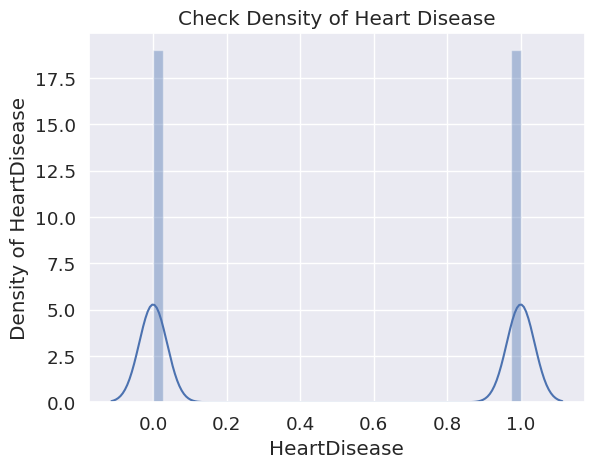

In [428]:
ax=sns.distplot(y_train)
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [429]:
model_name_lt=[]
Accuracy_lt=[]
Precision_lt=[]
Recall_lt=[]

 1)LINEAR REGRESSION:

In [430]:
linear_model()

The score of trained model is 0.7414306196757012
Confusion Matrix is
[[59607 27408]
 [ 2840  6084]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     87015
           1       0.18      0.68      0.29      8924

    accuracy                           0.68     95939
   macro avg       0.57      0.68      0.54     95939
weighted avg       0.88      0.68      0.75     95939

Accuracy: 0.6847163301681277
Precision: 0.1816553206735937
Recall 0.6817570596145226
F1_score: 0.2868728781591852


2) DECISION TREES :

In [431]:
decision_tree()

The score of trained model is 0.9946984888722464
Confusion Matrix is
[[74336 12679]
 [ 6378  2546]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     87015
           1       0.17      0.29      0.21      8924

    accuracy                           0.80     95939
   macro avg       0.54      0.57      0.55     95939
weighted avg       0.85      0.80      0.82     95939

Accuracy: 0.8013633663056734
Precision: 0.1672249589490969
Recall 0.28529807261317797
F1_score: 0.21085759244689223


3) RANDOM FOREST:

In [432]:
random_forest()

The score of trained model is 0.9946812441799163
Confusion Matrix is
[[78170  8845]
 [ 6885  2039]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     87015
           1       0.19      0.23      0.21      8924

    accuracy                           0.84     95939
   macro avg       0.55      0.56      0.56     95939
weighted avg       0.85      0.84      0.84     95939

Accuracy: 0.8360416514660357
Precision: 0.18733921352443955
Recall 0.22848498431196773
F1_score: 0.20587641357027464


4) GRADIENT BOOSTING:

In [433]:
gradient_boosting()

The score of trained model is 0.7866289582727716
Confusion Matrix is
[[63066 23949]
 [ 3082  5842]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     87015
           1       0.20      0.65      0.30      8924

    accuracy                           0.72     95939
   macro avg       0.57      0.69      0.56     95939
weighted avg       0.88      0.72      0.77     95939

Accuracy: 0.7182480534506301
Precision: 0.19609949313551073
Recall 0.654639175257732
F1_score: 0.3017951698308149


5) XGBOOSTING:

In [434]:
xg_boosting()

The score of trained model is 0.8588546568059874
Confusion Matrix is
[[72534 14481]
 [ 5214  3710]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     87015
           1       0.20      0.42      0.27      8924

    accuracy                           0.79     95939
   macro avg       0.57      0.62      0.58     95939
weighted avg       0.87      0.79      0.82     95939

Accuracy: 0.7947133074140861
Precision: 0.2039470067615854
Recall 0.4157328552218736
F1_score: 0.27364927162087405


6) ADA BOOSTING:

In [435]:
ada_boosting()

The score of trained model is 0.7656495582895236
Confusion Matrix is
[[58954 28061]
 [ 2765  6159]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     87015
           1       0.18      0.69      0.29      8924

    accuracy                           0.68     95939
   macro avg       0.57      0.68      0.54     95939
weighted avg       0.88      0.68      0.75     95939

Accuracy: 0.6786916686644638
Precision: 0.17998246639392168
Recall 0.6901613626176603
F1_score: 0.2855089931392546


In [436]:
  #Comparison of all smote sampling
def smote_result_table():
    All_models_result1={'Name':model_name_lt,
                      'Accuracy':Accuracy_lt,
                      'Precision':Precision_lt,
                      'Sample':'SMOTE',
                      'Recall':Recall_lt

                      }
    df=pd.DataFrame()
    df=pd.DataFrame(All_models_result1)

    return df

In [437]:
smote_sampling=smote_result_table()
smote_sampling

,Name,Accuracy,Precision,Sample,Recall
0,Logistic_Regression,0.684716,0.181655,SMOTE,0.681757
1,DECISION TREE,0.801363,0.167225,SMOTE,0.285298
2,RANDOM FOREST,0.836042,0.187339,SMOTE,0.228485
3,GRADIENT BOOSTING,0.718248,0.196099,SMOTE,0.654639
4,XG BOOSTING,0.794713,0.203947,SMOTE,0.415733
5,ADA BOOSTING,0.678692,0.179982,SMOTE,0.690161


In [438]:
smote_sampling.drop_duplicates(subset=list(smote_sampling.columns),keep='first',inplace=True)

In [439]:
smote_sampling

,Name,Accuracy,Precision,Sample,Recall
0,Logistic_Regression,0.684716,0.181655,SMOTE,0.681757
1,DECISION TREE,0.801363,0.167225,SMOTE,0.285298
2,RANDOM FOREST,0.836042,0.187339,SMOTE,0.228485
3,GRADIENT BOOSTING,0.718248,0.196099,SMOTE,0.654639
4,XG BOOSTING,0.794713,0.203947,SMOTE,0.415733
5,ADA BOOSTING,0.678692,0.179982,SMOTE,0.690161


SMOTE(TOTAL DATASET) OVERSAMPLING:

In [440]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 48)
x, y = sm.fit_resample(x,y)

print('After OverSampling, the shape of train_X: {}'.format(x.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 29819
Before OverSampling, counts of label '0': 289976 

After OverSampling, the shape of train_X: (579952, 17)
After OverSampling, the shape of train_y: (579952,) 

After OverSampling, counts of label '1': 289976
After OverSampling, counts of label '0': 289976


DATA AFTER SAMPLING: 

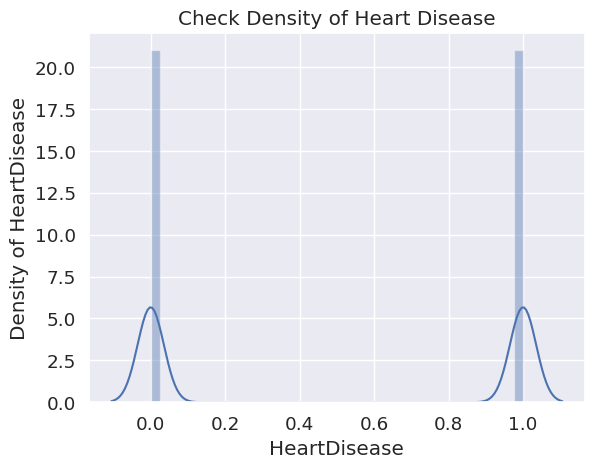

In [441]:
ax=sns.distplot(y)
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

SPLITTING DATASET:

In [442]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [443]:
model_name_lt=[]
Accuracy_lt=[]
Precision_lt=[]
Recall_lt=[]

1) LINEAR REGRESIION:

In [444]:
linear_model()

The score of trained model is 0.7406950335742402
Confusion Matrix is
[[59213 27395]
 [17678 69700]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     86608
           1       0.72      0.80      0.76     87378

    accuracy                           0.74    173986
   macro avg       0.74      0.74      0.74    173986
weighted avg       0.74      0.74      0.74    173986

Accuracy: 0.7409389261204925
Precision: 0.7178536484885937
Recall 0.7976836274577125
F1_score: 0.7556661408444596


2) DECISION TREES:

In [445]:
decision_tree()

The score of trained model is 0.9940561524856761
Confusion Matrix is
[[72419 14189]
 [12209 75169]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     86608
           1       0.84      0.86      0.85     87378

    accuracy                           0.85    173986
   macro avg       0.85      0.85      0.85    173986
weighted avg       0.85      0.85      0.85    173986

Accuracy: 0.8482751485751727
Precision: 0.8412117549631818
Recall 0.860273753118634
F1_score: 0.8506359768241898


3) RANDOM FOREST:

In [446]:
random_forest()

The score of trained model is 0.9940290566205051
Confusion Matrix is
[[75843 10765]
 [ 9644 77734]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     86608
           1       0.88      0.89      0.88     87378

    accuracy                           0.88    173986
   macro avg       0.88      0.88      0.88    173986
weighted avg       0.88      0.88      0.88    173986

Accuracy: 0.8826974584161944
Precision: 0.8783602074599713
Recall 0.8896289683902127
F1_score: 0.8839586756653798


4) GRADIENT BOOSTING:

In [447]:
gradient_boosting()

The score of trained model is 0.782127074681131
Confusion Matrix is
[[61431 25177]
 [12714 74664]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     86608
           1       0.75      0.85      0.80     87378

    accuracy                           0.78    173986
   macro avg       0.79      0.78      0.78    173986
weighted avg       0.79      0.78      0.78    173986

Accuracy: 0.7822181095030635
Precision: 0.7478290481866168
Recall 0.8544942662912861
F1_score: 0.797611353548518


5) XG BOOSTING:

In [448]:
xg_boosting()

The score of trained model is 0.8536774015557953
Confusion Matrix is
[[71656 14952]
 [11270 76108]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     86608
           1       0.84      0.87      0.85     87378

    accuracy                           0.85    173986
   macro avg       0.85      0.85      0.85    173986
weighted avg       0.85      0.85      0.85    173986

Accuracy: 0.84928672421919
Precision: 0.8358005710520536
Recall 0.8710201652589897
F1_score: 0.8530469967159463


6) ADA BOOSTING:

In [449]:
ada_boosting()

The score of trained model is 0.7616155047467029
Confusion Matrix is
[[58487 28121]
 [13262 74116]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.82      0.68      0.74     86608
           1       0.72      0.85      0.78     87378

    accuracy                           0.76    173986
   macro avg       0.77      0.76      0.76    173986
weighted avg       0.77      0.76      0.76    173986

Accuracy: 0.7621475291115377
Precision: 0.7249430245410174
Recall 0.8482226647439859
F1_score: 0.7817524984837698


In [450]:
  #Comparison of all models smote sampling(Total Dataset)
def smote_result_table_overall():
    All_models_result1={'Name':model_name_lt,
                      'Accuracy':Accuracy_lt,
                      'Precision':Precision_lt,
                      'Sample':'SMOTE(TOTAL DATASET)',
                      'Recall':Recall_lt

                      }
    df=pd.DataFrame()
    df=pd.DataFrame(All_models_result1)

    return df

In [451]:
smote_sampling_overall=smote_result_table_overall()

In [452]:
smote_sampling_overall

,Name,Accuracy,Precision,Sample,Recall
0,Logistic_Regression,0.740939,0.717854,SMOTE(TOTAL DATASET),0.797684
1,DECISION TREE,0.848275,0.841212,SMOTE(TOTAL DATASET),0.860274
2,RANDOM FOREST,0.882697,0.878360,SMOTE(TOTAL DATASET),0.889629
3,GRADIENT BOOSTING,0.782218,0.747829,SMOTE(TOTAL DATASET),0.854494
4,XG BOOSTING,0.849287,0.835801,SMOTE(TOTAL DATASET),0.871020
5,ADA BOOSTING,0.762148,0.724943,SMOTE(TOTAL DATASET),0.848223


ADASYN RESAMPLING: 

In [453]:
x.shape

(579952, 17)

In [454]:
x=df.drop(['SkinCancer'],axis=1)
y=df['SkinCancer']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [455]:
y_train.shape

(223856,)

In [456]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import ADASYN
sm = ADASYN(sampling_strategy='minority',random_state = 48)
x_train, y_train = sm.fit_resample(x_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train== 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 20895
Before OverSampling, counts of label '0': 202961 

After OverSampling, the shape of train_X: (407746, 17)
After OverSampling, the shape of train_y: (407746,) 

After OverSampling, counts of label '1': 204785
After OverSampling, counts of label '0': 202961


DATASET AFTER ADASYN SAMPLING:

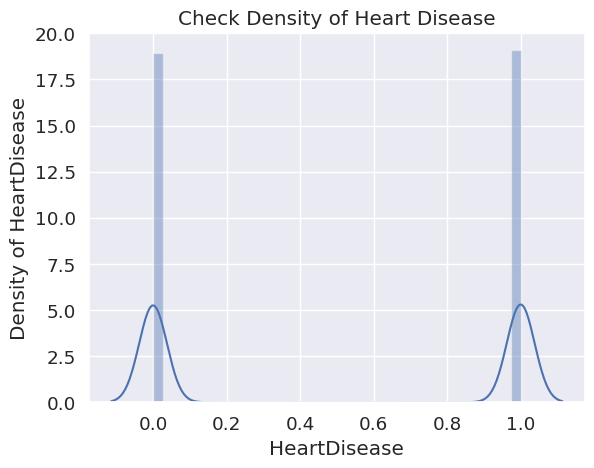

In [457]:
ax=sns.distplot(y_train)
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [458]:
model_name_lt=[]
Accuracy_lt=[]
Precision_lt=[]
Recall_lt=[]

1) LINEAR REGRESSION:

In [459]:
linear_model()

The score of trained model is 0.7315362995590392
Confusion Matrix is
[[58457 28558]
 [ 2866  6058]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     87015
           1       0.18      0.68      0.28      8924

    accuracy                           0.67     95939
   macro avg       0.56      0.68      0.53     95939
weighted avg       0.88      0.67      0.74     95939

Accuracy: 0.6724585413648255
Precision: 0.17500577767506356
Recall 0.6788435679067683
F1_score: 0.2782728525493799


2) DECISION TREES:

In [460]:
decision_tree()

The score of trained model is 0.9946780593801042
Confusion Matrix is
[[74208 12807]
 [ 6392  2532]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     87015
           1       0.17      0.28      0.21      8924

    accuracy                           0.80     95939
   macro avg       0.54      0.57      0.55     95939
weighted avg       0.85      0.80      0.82     95939

Accuracy: 0.7998832591542543
Precision: 0.16506943086250733
Recall 0.2837292693859256
F1_score: 0.208712854964349


3) RANDOM FOREST:

In [461]:
random_forest()

The score of trained model is 0.9946510818009251
Confusion Matrix is
[[77847  9168]
 [ 6866  2058]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     87015
           1       0.18      0.23      0.20      8924

    accuracy                           0.83     95939
   macro avg       0.55      0.56      0.56     95939
weighted avg       0.85      0.83      0.84     95939

Accuracy: 0.8328729713672229
Precision: 0.18332442544094069
Recall 0.2306140744060959
F1_score: 0.2042679900744417


4) GRADIENT BOOSTING :

In [462]:
gradient_boosting()

The score of trained model is 0.7822958410382934
Confusion Matrix is
[[62160 24855]
 [ 3104  5820]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.95      0.71      0.82     87015
           1       0.19      0.65      0.29      8924

    accuracy                           0.71     95939
   macro avg       0.57      0.68      0.56     95939
weighted avg       0.88      0.71      0.77     95939

Accuracy: 0.708575240517412
Precision: 0.18973105134474327
Recall 0.6521739130434783
F1_score: 0.2939468168388091


5) XG BOOSTING:

In [463]:
xg_boosting()

The score of trained model is 0.8555228009594208
Confusion Matrix is
[[72412 14603]
 [ 5268  3656]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     87015
           1       0.20      0.41      0.27      8924

    accuracy                           0.79     95939
   macro avg       0.57      0.62      0.57     95939
weighted avg       0.86      0.79      0.82     95939

Accuracy: 0.7928788084095102
Precision: 0.2002300235500301
Recall 0.4096817570596145
F1_score: 0.26899164919251006


6) ADA BOOSTING:

In [464]:
ada_boosting()

The score of trained model is 0.7604709794823248
Confusion Matrix is
[[59367 27648]
 [ 2913  6011]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.95      0.68      0.80     87015
           1       0.18      0.67      0.28      8924

    accuracy                           0.68     95939
   macro avg       0.57      0.68      0.54     95939
weighted avg       0.88      0.68      0.75     95939

Accuracy: 0.6814538404611263
Precision: 0.17858522237737307
Recall 0.6735768713581354
F1_score: 0.28231923537561937


In [465]:
  #Comparison of all models adasyn sampling
def adasyn_result_table():
    All_models_result={'Name':model_name_lt,
                      'Accuracy':Accuracy_lt,
                      'Precision':Precision_lt,
                       'Sample':'ADASYN',
                      'Recall':Recall_lt

                      }
    df=pd.DataFrame()
    df=pd.DataFrame(All_models_result)

    return df

In [466]:
adasyn_sampling= adasyn_result_table()

ADASYN(TOTAL SAMPLING):

In [467]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 48)
x, y = sm.fit_resample(x,y)

print('After OverSampling, the shape of train_X: {}'.format(x.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 29819
Before OverSampling, counts of label '0': 289976 

After OverSampling, the shape of train_X: (587184, 17)
After OverSampling, the shape of train_y: (587184,) 

After OverSampling, counts of label '1': 297208
After OverSampling, counts of label '0': 289976


DATASET AFTER SAMPLING:

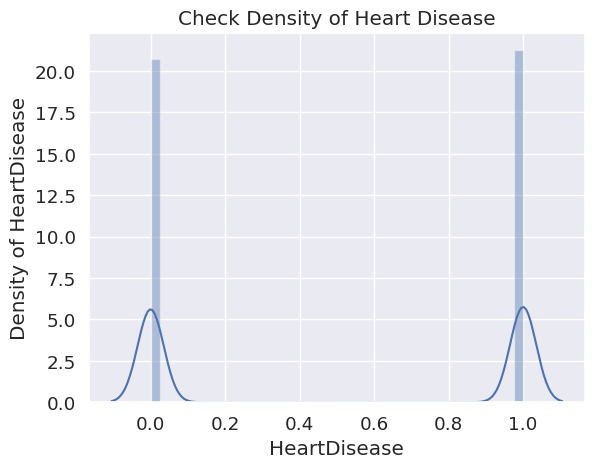

In [468]:
ax=sns.distplot(y)
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

DATA SPLITTING:

In [469]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [470]:
model_name_lt=[]
Accuracy_lt=[]
Precision_lt=[]
Recall_lt=[]

1) LINEAR REGRESSION:

In [471]:
linear_model()

The score of trained model is 0.7315705985966893
Confusion Matrix is
[[57821 28952]
 [18027 71356]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.76      0.67      0.71     86773
           1       0.71      0.80      0.75     89383

    accuracy                           0.73    176156
   macro avg       0.74      0.73      0.73    176156
weighted avg       0.74      0.73      0.73    176156

Accuracy: 0.7333102477349622
Precision: 0.7113689835307254
Recall 0.7983173534117226
F1_score: 0.7523393308064168


2) DECISION TREES:

In [472]:
decision_tree()

The score of trained model is 0.994063664762498
Confusion Matrix is
[[72269 14504]
 [12339 77044]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     86773
           1       0.84      0.86      0.85     89383

    accuracy                           0.85    176156
   macro avg       0.85      0.85      0.85    176156
weighted avg       0.85      0.85      0.85    176156

Accuracy: 0.8476180203910171
Precision: 0.8415694499060602
Recall 0.8619536153407248
F1_score: 0.851639575307714


3) RANDOM FOREST:

In [473]:
random_forest()

The score of trained model is 0.9940223050497776
Confusion Matrix is
[[75679 11094]
 [ 9783 79600]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     86773
           1       0.88      0.89      0.88     89383

    accuracy                           0.88    176156
   macro avg       0.88      0.88      0.88    176156
weighted avg       0.88      0.88      0.88    176156

Accuracy: 0.8814857285587775
Precision: 0.8776765827948927
Recall 0.8905496570936308
F1_score: 0.8840662605441005


4) GRADIENT BOOSTING:

In [474]:
gradient_boosting()

The score of trained model is 0.777440952927781
Confusion Matrix is
[[60785 25988]
 [12991 76392]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.82      0.70      0.76     86773
           1       0.75      0.85      0.80     89383

    accuracy                           0.78    176156
   macro avg       0.79      0.78      0.78    176156
weighted avg       0.78      0.78      0.78    176156

Accuracy: 0.7787245396126161
Precision: 0.7461613596405547
Recall 0.854659163375586
F1_score: 0.7967334678744075


5) XG BOOST:

In [475]:
xg_boosting()

The score of trained model is 0.8514967350156194
Confusion Matrix is
[[70983 15790]
 [11292 78091]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     86773
           1       0.83      0.87      0.85     89383

    accuracy                           0.85    176156
   macro avg       0.85      0.85      0.85    176156
weighted avg       0.85      0.85      0.85    176156

Accuracy: 0.8462612684211721
Precision: 0.8318083531278959
Recall 0.8736672521620442
F1_score: 0.852224113846691


6) ADA BOOST:

In [476]:
ada_boosting()

The score of trained model is 0.7546493182946173
Confusion Matrix is
[[57285 29488]
 [13296 76087]]
Classification Matrix
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     86773
           1       0.72      0.85      0.78     89383

    accuracy                           0.76    176156
   macro avg       0.77      0.76      0.75    176156
weighted avg       0.77      0.76      0.75    176156

Accuracy: 0.757124367038307
Precision: 0.7206914515747099
Recall 0.8512468813980287
F1_score: 0.7805476051252065


In [477]:
  #Comparison of all models adasyn(Total Dataset) sampling
def ada_result_table_overall():
    All_models_result1={'Name':model_name_lt,
                      'Accuracy':Accuracy_lt,
                      'Precision':Precision_lt,
                      'Sample':'ADASYN(TOTAL DATASET)',
                      'Recall':Recall_lt

                      }
    df=pd.DataFrame()
    df=pd.DataFrame(All_models_result1)

    return df

In [478]:
adasyn_sampling_overall=ada_result_table_overall()

In [479]:
Total_df=pd.concat([without_sampling,smote_sampling,adasyn_sampling,smote_sampling_overall,adasyn_sampling_overall],axis=0)

In [480]:
Total_df

,Name,Accuracy,Precision,Sample,Recall
0,Logistic_Regression,0.906972,0.473684,Actual,0.001009
1,DECISION TREE,0.844276,0.185487,Actual,0.198790
2,RANDOM FOREST,0.888856,0.209683,Actual,0.070372
3,GRADIENT BOOSTING,0.906920,0.312500,Actual,0.000560
4,XG BOOSTING,0.906670,0.395833,Actual,0.006387
5,ADA BOOSTING,0.906962,0.416667,Actual,0.000560
0,Logistic_Regression,0.684716,0.181655,SMOTE,0.681757
1,DECISION TREE,0.801363,0.167225,SMOTE,0.285298
2,RANDOM FOREST,0.836042,0.187339,SMOTE,0.228485
3,GRADIENT BOOSTING,0.718248,0.196099,SMOTE,0.654639


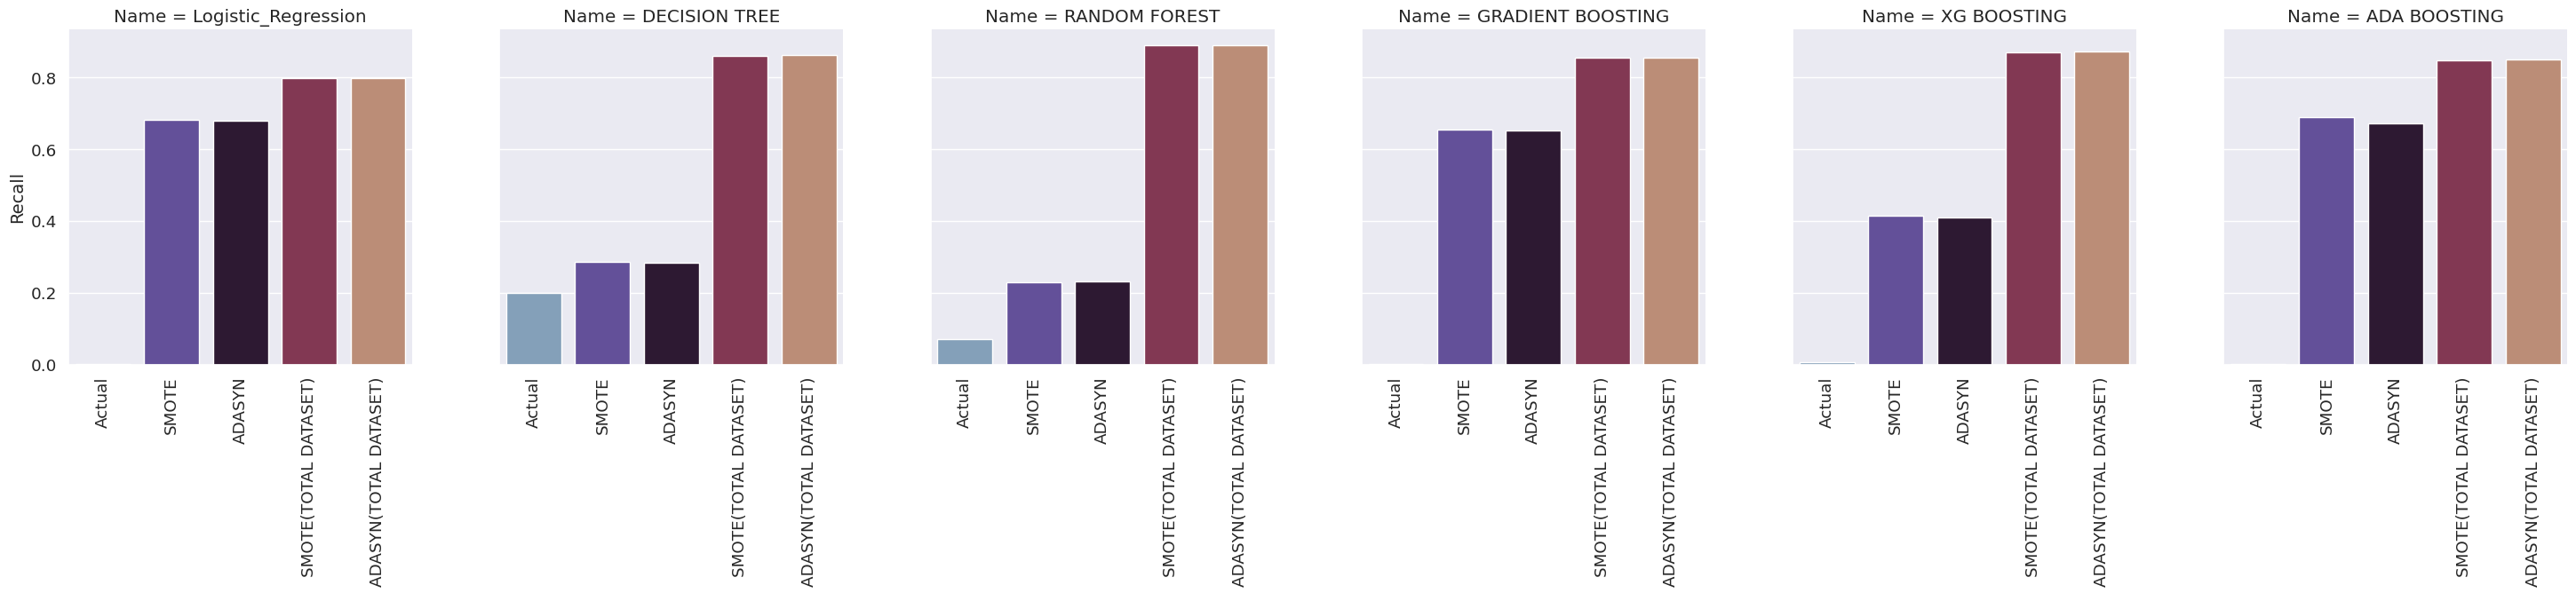

In [481]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(Total_df, col="Name", height=5,col_wrap=6, sharex=False)
g.map(sns.barplot, "Sample", "Recall", palette='twilight', order=["Actual", "SMOTE", "ADASYN","SMOTE(TOTAL DATASET)","ADASYN(TOTAL DATASET)"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=7)
g.set_ylabels('Recall', fontsize=14)


# **5) PROJECT REPORT:**

**MODEL REPORT:**

---



```
HIGH PERFORMANCE MODEL:
```





*   From various models that bulit and evaluated, RANDOM FOREST MODEL OF SMOTE(TOTAL DATASET) RE-SAMPLED  is High Performance Model
*   Models Accuracy---->88%;
    Precision-----> 88%;
    RECALL -----> 89%.

***REASON FOR THIS HIGH PERFORMANCE MODEL NOT BEST MODEL:***

*   Even though this model gives high accuracy, high recall,and high precision it is not best genral model as it is very sensitive to new datasets and doesnot perform well when trained/tested with new datasets.


```
BEST MODEL:
```
*   From various models that bulit and evaluated, ADA BOOST MODEL OF SMOTE RE-SAMPLED DATASETS is Best Generalised Model
*   Models Accuracy---->68%;
    Precision-----> 18%
    RECALL -----> 69%

***REASON BEHIND CHOOSING BEST MODEL:*** 
*  This model prediction of Skin Disease is doing 90% good while predicting the Actual Patients.so, when you test this model, there is 90% of chances that the actual patients can't be missed.
*   It's Probablity of Identifying Patient is Higher than Other Models. In another way, Probablity of Not correctly Identifying Patients is lower when compared with Other models.

***SCOPE FOR IMPROVEMENT IN MODEL:***
*   Hybrid Techinques of sampling can be done. For Example, SMOTE+TOMEK Resampling,SMOTE + ENN Resampling etc

**NOTE:**  When we oversample overall (Training + Testing) dataset,ACCURACY,PRECISION AND RECALL IS ALMOST 90%. But it is loses it genralising abilty.That's why only Models with oversampling Training Datsets are considered in the bracket of BEST MODELS.





***VISUALISATION INFERENCE FROM DATASETS:***

***FOR SkinCancer:***

```
FOR SkinCancer:
```
INFERENCE FROM  BALANCE FEATURE: 
*    **Most of the 'SkinCare' Affected Patients are above 45 Age Category** is very valid as it is collected from Data is Balance (Feature--> 'AgeCategory)'

INFERENCE FROM IMBALANCE FEATURE:

*    **White Race People got mostly affected with 'SkinCare'**than all other races. Other race people such as Asian,AlaskanNative,Black,Hispanian are not affected mostly.


```
FOR HeartDisease:
```
INFERENCE FROM BALANCE FEATURE:
*    **Most of the 'HeartDisease' Affected Patients are above 45 Age Category**.

*    Male has slightly higher chances of having HeartDisease than Female.

*    **Almost 15% of Smoking People have risk of ending up in 'HeartDisease'**

INFERENCE FROM IMBALANCE FEATURES:

*    One-Fourth of People having KidneyDisease,have also 'HeartDisease'.

*    Almost Half Of stroke affected people have "HeartDisease".


```
FOR OTHER FEATURES:
```
*   Feature 'Diffwalking' Is highly correlated to various Features.
*   So IT is Most Influencial Feature.

**BUSINESS SCOPE OF INFERENCE:**
*  The Insurance Company can take away Old Age People have risk of affecting 'SkinCancer' and 'HeartDisease'.So They can Avoid giving claim for those Diseases. 

* They can also avoid giving claim to Kidney affected Patients as they have 50% chances of getting heartdisease. 

**SCOPE OF IMPROVEMENT OF MODEL:**
*   Collecting Features with high correlation can be done.
*   And also I use this HeartDisease Dataset for prediction of 'SkinCancer'. So, It performes well with dataset collected mainly for prediction of 'SkinCancer'.



